In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from scipy.ndimage import find_objects
from matplotlib.colors import Normalize
from src.cpm_basic import CellularPottsModel


In [2]:
n_cells=50 
n_types=2 
T=1 
L=100
C_v=1
C_p=5
adhessions= np.array([[1, 20],
                      [20, 1]]) 
lattice_type=None
object_volumes=None


cpm = CellularPottsModel(n_cells=n_cells, n_types=n_types, T=T, L=L, C_v=C_v, C_p=C_p, 
                         adhessions=adhessions, lattice_type=lattice_type, object_volumes=object_volumes)
a=cpm.run_a_sim(steps=10000)

100%|██████████| 10000/10000 [00:11<00:00, 889.75it/s]


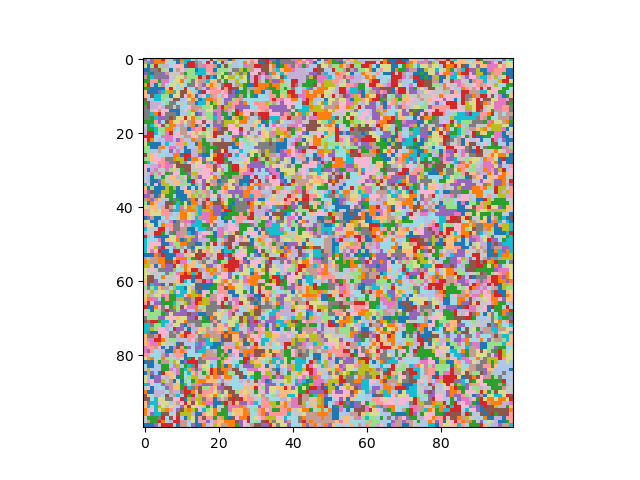

In [3]:
plt.imshow(a, cmap='tab20')